In [126]:
import sqlite3
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

In [127]:
import pandas as pd
cur.execute("""Select *
               From Matches
;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


# Total Goals

In [153]:
cur.execute("""Select Season, Date, HomeTeam, Div, FTR as Result, sum(FTHG) As Home_Goals
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
               Group By HomeTeam
               
               
;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head(10)

,Season,Date,HomeTeam,Div,Result,Home_Goals
0,2011,2012-03-30,Aachen,D2,A,15
1,2011,2011-11-06,Augsburg,D1,A,20
2,2011,2011-11-19,Bayern Munich,D1,A,49
3,2011,2012-03-02,Bochum,D2,A,23
4,2011,2011-10-22,Braunschweig,D2,A,21
5,2011,2011-07-15,Cottbus,D2,H,18
6,2011,2012-04-11,Dortmund,D1,H,44
7,2011,2012-02-24,Dresden,D2,H,30
8,2011,2011-08-26,Duisburg,D2,H,23
9,2011,2012-03-16,Ein Frankfurt,D2,H,38


In [154]:
df.head()

,Season,Date,HomeTeam,Div,Result,Home_Goals
0,2011,2012-03-30,Aachen,D2,A,15
1,2011,2011-11-06,Augsburg,D1,A,20
2,2011,2011-11-19,Bayern Munich,D1,A,49
3,2011,2012-03-02,Bochum,D2,A,23
4,2011,2011-10-22,Braunschweig,D2,A,21


In [155]:
cur.execute("""Select Season, Date, AwayTeam, Div, FTR as Result, sum(FTAG) As Away_Goals
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
               Group By AwayTeam
               
;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,Season,Date,AwayTeam,Div,Result,Away_Goals
0,2011,2011-11-20,Aachen,D2,H,15
1,2011,2011-08-27,Augsburg,D1,H,16
2,2011,2012-03-31,Bayern Munich,D1,A,28
3,2011,2011-11-27,Bochum,D2,H,18
4,2011,2011-11-18,Braunschweig,D2,H,16


In [157]:
df1.head()

,Season,Date,AwayTeam,Div,Result,Away_Goals
0,2011,2011-11-20,Aachen,D2,H,15
1,2011,2011-08-27,Augsburg,D1,H,16
2,2011,2012-03-31,Bayern Munich,D1,A,28
3,2011,2011-11-27,Bochum,D2,H,18
4,2011,2011-11-18,Braunschweig,D2,H,16


In [158]:
goals = pd.concat([df, df1], axis=1, join='inner')

In [159]:
goals.head()

,Season,Date,HomeTeam,Div,Result,Home_Goals,Season,Date,AwayTeam,Div,Result,Away_Goals
0,2011,2012-03-30,Aachen,D2,A,15,2011,2011-11-20,Aachen,D2,H,15
1,2011,2011-11-06,Augsburg,D1,A,20,2011,2011-08-27,Augsburg,D1,H,16
2,2011,2011-11-19,Bayern Munich,D1,A,49,2011,2012-03-31,Bayern Munich,D1,A,28
3,2011,2012-03-02,Bochum,D2,A,23,2011,2011-11-27,Bochum,D2,H,18
4,2011,2011-10-22,Braunschweig,D2,A,21,2011,2011-11-18,Braunschweig,D2,H,16


In [160]:
goals['Total_Goals'] = goals['Home_Goals'] + goals['Away_Goals']
goals.head()

,Season,Date,HomeTeam,Div,Result,Home_Goals,Season,Date,AwayTeam,Div,Result,Away_Goals,Total_Goals
0,2011,2012-03-30,Aachen,D2,A,15,2011,2011-11-20,Aachen,D2,H,15,30
1,2011,2011-11-06,Augsburg,D1,A,20,2011,2011-08-27,Augsburg,D1,H,16,36
2,2011,2011-11-19,Bayern Munich,D1,A,49,2011,2012-03-31,Bayern Munich,D1,A,28,77
3,2011,2012-03-02,Bochum,D2,A,23,2011,2011-11-27,Bochum,D2,H,18,41
4,2011,2011-10-22,Braunschweig,D2,A,21,2011,2011-11-18,Braunschweig,D2,H,16,37


# Win

In [161]:
cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS AwayWins
               FROM Matches
               Where Season = 2011
               AND FTR = 'A'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY AwayTeam
               ;''')
AwayWins_df = pd.DataFrame(cur.fetchall())
AwayWins_df.columns = [x[0] for x in cur.description]
AwayWins_df.head()

,Team,AwayWins
0,Aachen,2
1,Augsburg,2
2,Bayern Munich,9
3,Bochum,3
4,Braunschweig,4


In [162]:
cur.execute('''SELECT Season, HomeTeam AS Team, COUNT(FTR) AS HomeWins
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY HomeTeam
               ;''')
HomeWins_df = pd.DataFrame(cur.fetchall())
HomeWins_df.columns = [x[0] for x in cur.description]
HomeWins_df.head()

,Season,Team,HomeWins
0,2011,Aachen,4
1,2011,Augsburg,6
2,2011,Bayern Munich,14
3,2011,Bochum,7
4,2011,Braunschweig,6


In [163]:
goals['TotalWins']= HomeWins_df.HomeWins + AwayWins_df.AwayWins
goals.tail()

,Season,Date,HomeTeam,Div,Result,Home_Goals,Season,Date,AwayTeam,Div,Result,Away_Goals,Total_Goals,TotalWins
31,2011,2011-11-27,St Pauli,D2,H,36,2011,2011-08-12,St Pauli,D2,A,23,59,18
32,2011,2011-12-11,Stuttgart,D1,A,36,2011,2011-12-17,Stuttgart,D1,H,27,63,15
33,2011,2012-02-11,Union Berlin,D2,H,30,2011,2011-07-15,Union Berlin,D2,D,25,55,14
34,2011,2012-04-21,Werder Bremen,D1,A,31,2011,2011-11-19,Werder Bremen,D1,H,18,49,11
35,2011,2011-08-13,Wolfsburg,D1,A,29,2011,2011-08-06,Wolfsburg,D1,A,18,47,13


# Loss

In [164]:
cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS AwayLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'H'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY AwayTeam
               ;''')
AwayLosses_df = pd.DataFrame(cur.fetchall())
AwayLosses_df.columns = [x[0] for x in cur.description]
AwayLosses_df.head()

,Team,AwayLosses
0,Aachen,8
1,Augsburg,8
2,Bayern Munich,5
3,Bochum,10
4,Braunschweig,6


In [165]:
cur.execute('''SELECT Season, HomeTeam AS Team, COUNT(FTR) AS HomeLosses
               FROM Matches
               Where Season = 2011
               AND FTR = 'A'
               AND ((Div = 'D1' OR Div = 'D2'))
               GROUP BY HomeTeam
               ;''')
HomeLosses_df = pd.DataFrame(cur.fetchall())
HomeLosses_df.columns = [x[0] for x in cur.description]
HomeLosses_df.head()

,Season,Team,HomeLosses
0,2011,Aachen,7
1,2011,Augsburg,4
2,2011,Bayern Munich,2
3,2011,Bochum,7
4,2011,Braunschweig,3


In [166]:
goals['TotalLosses']= HomeLosses_df.HomeLosses + AwayLosses_df.AwayLosses
goals.tail()

,Season,Date,HomeTeam,Div,Result,Home_Goals,Season,Date,AwayTeam,Div,Result,Away_Goals,Total_Goals,TotalWins,TotalLosses
31,2011,2011-11-27,St Pauli,D2,H,36,2011,2011-08-12,St Pauli,D2,A,23,59,18,10.0
32,2011,2011-12-11,Stuttgart,D1,A,36,2011,2011-12-17,Stuttgart,D1,H,27,63,15,11.0
33,2011,2012-02-11,Union Berlin,D2,H,30,2011,2011-07-15,Union Berlin,D2,D,25,55,14,15.0
34,2011,2012-04-21,Werder Bremen,D1,A,31,2011,2011-11-19,Werder Bremen,D1,H,18,49,11,14.0
35,2011,2011-08-13,Wolfsburg,D1,A,29,2011,2011-08-06,Wolfsburg,D1,A,18,47,13,NaN


# Deleting Columns

In [167]:
goals = goals[["Season", "Date","Div","HomeTeam", "AwayTeam" , "Result", "Total_Goals", "TotalWins", "TotalLosses"]]

In [168]:
goals.head()

,Season,Season,Date,Date,Div,Div,HomeTeam,AwayTeam,Result,Result,Total_Goals,TotalWins,TotalLosses
0,2011,2011,2012-03-30,2011-11-20,D2,D2,Aachen,Aachen,A,H,30,6,15.0
1,2011,2011,2011-11-06,2011-08-27,D1,D1,Augsburg,Augsburg,A,H,36,8,12.0
2,2011,2011,2011-11-19,2012-03-31,D1,D1,Bayern Munich,Bayern Munich,A,A,77,23,7.0
3,2011,2011,2012-03-02,2011-11-27,D2,D2,Bochum,Bochum,A,H,41,10,17.0
4,2011,2011,2011-10-22,2011-11-18,D2,D2,Braunschweig,Braunschweig,A,H,37,10,9.0


In [169]:
goals.columns = ['Season1', 'Season2', 'Date1', 'Date2', 'Div1', 'Div2', 'TeamName1', 'TeamName2', 'Result1', 'Result2', 'Total_Goals', 'Total_Wins', 'TotalLosses']

In [170]:
goals.head()

,Season1,Season2,Date1,Date2,Div1,Div2,TeamName1,TeamName2,Result1,Result2,Total_Goals,Total_Wins,TotalLosses
0,2011,2011,2012-03-30,2011-11-20,D2,D2,Aachen,Aachen,A,H,30,6,15.0
1,2011,2011,2011-11-06,2011-08-27,D1,D1,Augsburg,Augsburg,A,H,36,8,12.0
2,2011,2011,2011-11-19,2012-03-31,D1,D1,Bayern Munich,Bayern Munich,A,A,77,23,7.0
3,2011,2011,2012-03-02,2011-11-27,D2,D2,Bochum,Bochum,A,H,41,10,17.0
4,2011,2011,2011-10-22,2011-11-18,D2,D2,Braunschweig,Braunschweig,A,H,37,10,9.0


In [171]:
del goals['Season2']
del goals['Div2']
del goals['TeamName2']
del goals['Date2']
del goals['Result1']
del goals['Result2']

In [172]:
goals.head()

,Season1,Date1,Div1,TeamName1,Total_Goals,Total_Wins,TotalLosses
0,2011,2012-03-30,D2,Aachen,30,6,15.0
1,2011,2011-11-06,D1,Augsburg,36,8,12.0
2,2011,2011-11-19,D1,Bayern Munich,77,23,7.0
3,2011,2012-03-02,D2,Bochum,41,10,17.0
4,2011,2011-10-22,D2,Braunschweig,37,10,9.0


In [173]:
goals.columns = ['Season', 'Date', 'Div', 'TeamName', 'TotalGoal', 'TotalWins', 'TotalLosses']

In [174]:
goals.head()

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses
0,2011,2012-03-30,D2,Aachen,30,6,15.0
1,2011,2011-11-06,D1,Augsburg,36,8,12.0
2,2011,2011-11-19,D1,Bayern Munich,77,23,7.0
3,2011,2012-03-02,D2,Bochum,41,10,17.0
4,2011,2011-10-22,D2,Braunschweig,37,10,9.0


# Data Visualisation Version 1

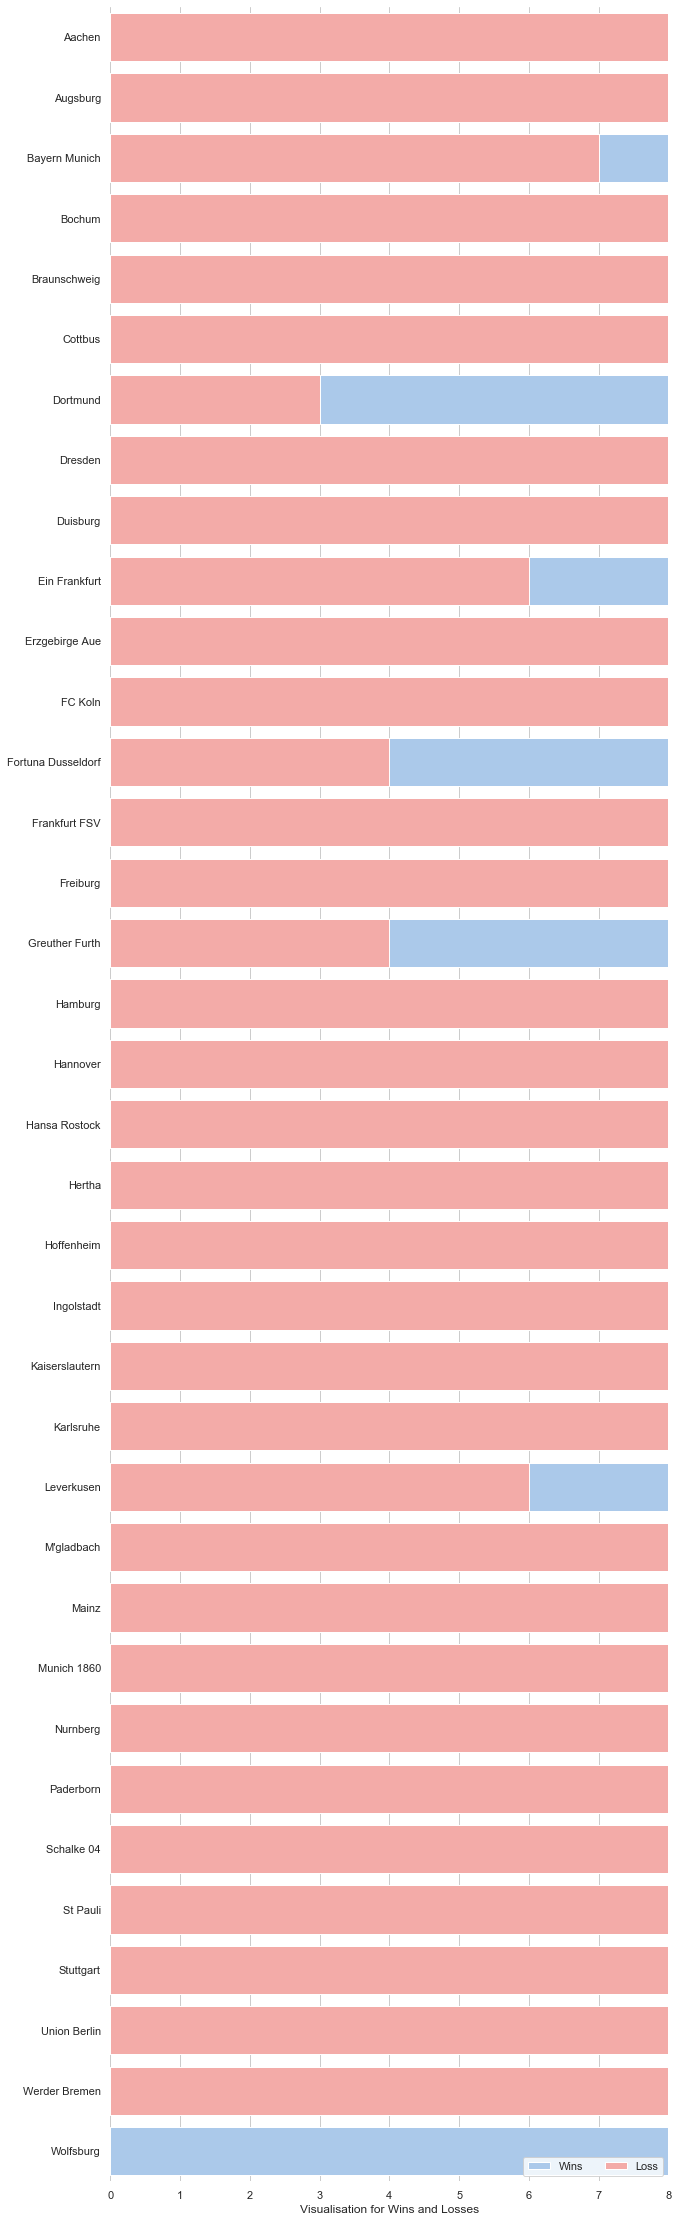

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 40))

# sns.goals.sort_values("Total_Wins", ascending=False)
sns.set_color_codes("pastel")
bar1 = sns.barplot(x="TotalWins", y="TeamName", data=goals,
            label="Wins", color="b")

sns.set_color_codes("pastel")
bar2 = sns.barplot(x="TotalLosses", y="TeamName", data=goals,
            label="Loss", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 8), ylabel="",
       xlabel="Visualisation for Wins and Losses")
sns.despine(left=True, bottom=True)

# Data Visualisation Version 2

Text(0, 0.5, 'Teams')

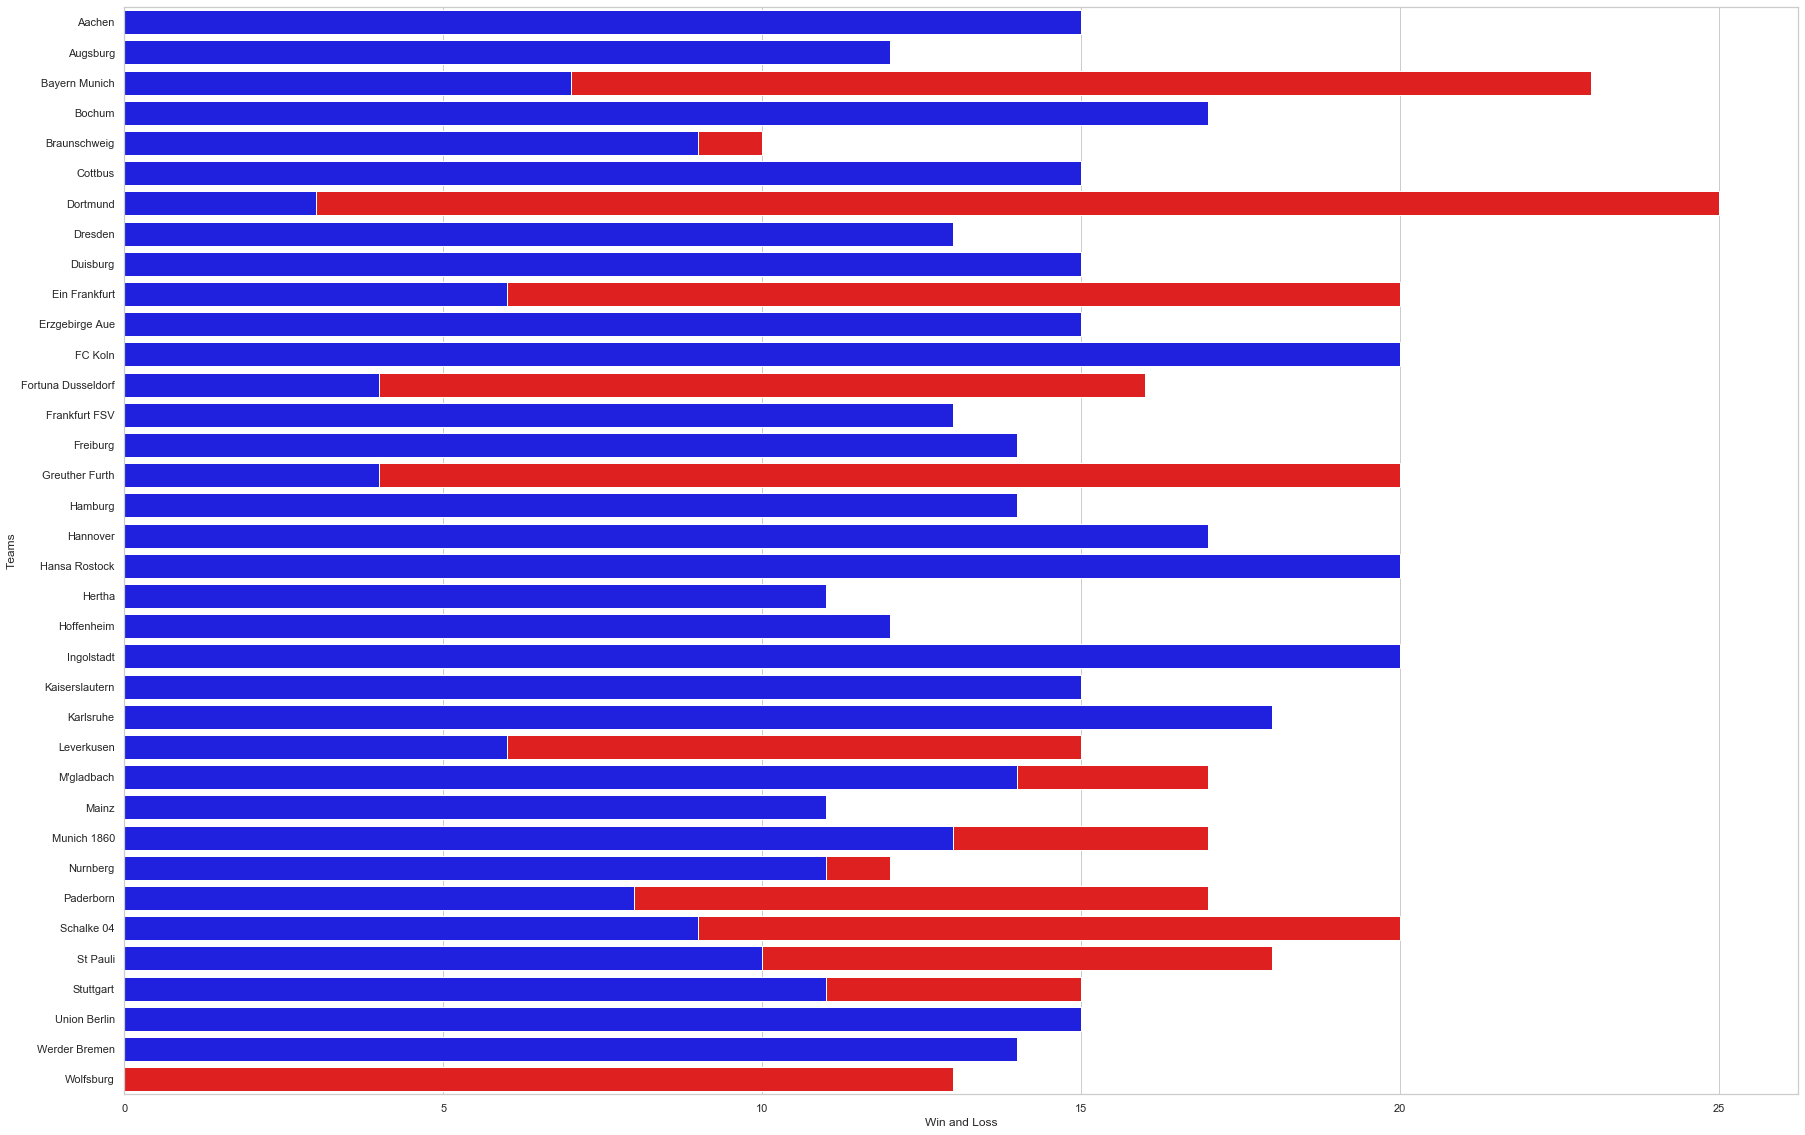

In [176]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x="TotalWins" , y = "TeamName", data=goals , color='red')
ax2 = sns.barplot(x='TotalLosses', y="TeamName", data=goals, color ='blue')
plt.xlabel("Win and Loss")
plt.ylabel("Teams")


# Weather

In [64]:
cur.execute("""Select *
               From Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
;""")
new = pd.DataFrame(cur.fetchall())
new.columns = [x[0] for x in cur.description]
new.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [182]:
Date = goals.Date
print(goals.shape)

(36, 7)


In [183]:
Date = list(goals.Date.unique())
len(Date)

33

In [184]:
resp = requests.get(f'https://api.darksky.net/forecast/{api_key}/{lat},{long},2011-05-12T15:00:00')
result = resp.json()

In [185]:
result.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [186]:
result['daily'].keys()

dict_keys(['data'])

In [187]:
result['daily']['data'][0]['icon']

'rain'

In [188]:
result['daily']['data'][0]['summary']

'Light rain in the evening and overnight.'

In [189]:
result['timezone']

'Europe/Berlin'

In [190]:
for key in result['daily'].keys():
    print(key , type(result['daily'][key]))


data <class 'list'>


In [191]:
#writing the class
class WeatherGetter(object):
    """First initialised using Lat, Long data. By default latitude
    and long is of Berlin. Note there has been some changes in the
    API . Read Detrous/darksky on github. He fixed the summary issue
    a few days ago. Return to his github whenever you have any issues
    """
    def __init__(self, loc =["52.5200", "13.4050"]):
        self.lat = loc[0]
        self.long = loc[1]
        self.url = "https://api.darksky.net/forecast/{}/{},{},{}T12:00:00?exclude=currently,flag"
    def keys(self, path='/Users/lynguyenova/.secret/dark_sky_api.json'):
        with open(path) as f:
            keys = json.load(f)
        return keys['api_key']
    def onDay(self, date):
        api_key = self.keys()
        resp = requests.get(self.url.format(api_key,self.lat,self.long, date))
        result = resp.json()
        try:
            weather = result['daily']['data'][0]['icon']
        except:
            try:
                weather = result['daily']['data'][0]['summary']
            except:
                weather = 'no data'
        return weather
    def for_days(self, datelist):
        weather = []
        for date in datelist:
            weather.append(self.onDay(date))
        return weather
    def test_one(self, date, cond='rain'):
        self.cond = cond
        weather_report = self.onDay(date)
        try:
            if cond in weather_report:
                return True
            else:
                return False
        except:
            return '?'
    def test_many(self, datelist, cond='rain'):
        weather_reports = {}
        for date in datelist:
            weather_reports[date] = self.test_one(date, cond)
        return weather_reports

In [192]:
weather = WeatherGetter()
weather_Report = weather.test_many(Date)

In [193]:
weather_Report

{'2012-03-30': False,
 '2011-11-06': False,
 '2011-11-19': False,
 '2012-03-02': False,
 '2011-10-22': False,
 '2011-07-15': False,
 '2012-04-11': False,
 '2012-02-24': True,
 '2011-08-26': False,
 '2012-03-16': False,
 '2012-04-21': False,
 '2012-05-05': True,
 '2011-11-04': False,
 '2012-05-06': True,
 '2012-02-18': False,
 '2011-08-06': True,
 '2012-02-04': False,
 '2011-10-23': False,
 '2011-12-18': True,
 '2012-03-17': False,
 '2011-10-01': False,
 '2011-09-16': False,
 '2011-08-27': False,
 '2012-03-03': False,
 '2012-01-20': True,
 '2011-11-27': False,
 '2011-10-02': False,
 '2012-03-31': True,
 '2012-02-17': True,
 '2011-09-18': True,
 '2011-12-11': False,
 '2012-02-11': False,
 '2011-08-13': False}

In [194]:
Rainy_day = []
for date in goals.Date:
    Rainy_day.append(weather_Report[date])


In [195]:
goals['Rainy_day'] = Rainy_day

In [196]:
goals.head()

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses,Rainy_day
0,2011,2012-03-30,D2,Aachen,30,6,15.0,False
1,2011,2011-11-06,D1,Augsburg,36,8,12.0,False
2,2011,2011-11-19,D1,Bayern Munich,77,23,7.0,False
3,2011,2012-03-02,D2,Bochum,41,10,17.0,False
4,2011,2011-10-22,D2,Braunschweig,37,10,9.0,False


In [197]:
goals

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses,Rainy_day
0,2011,2012-03-30,D2,Aachen,30,6,15.0,False
1,2011,2011-11-06,D1,Augsburg,36,8,12.0,False
2,2011,2011-11-19,D1,Bayern Munich,77,23,7.0,False
3,2011,2012-03-02,D2,Bochum,41,10,17.0,False
4,2011,2011-10-22,D2,Braunschweig,37,10,9.0,False
5,2011,2011-07-15,D2,Cottbus,30,8,15.0,False
6,2011,2012-04-11,D1,Dortmund,80,25,3.0,False
7,2011,2012-02-24,D2,Dresden,50,12,13.0,True
8,2011,2011-08-26,D2,Duisburg,42,10,15.0,False
9,2011,2012-03-16,D2,Ein Frankfurt,76,20,6.0,False


# Percentage of Wins

In [204]:
rain = goals.loc[goals['Rainy_day'] == True]

In [205]:
rain

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses,Rainy_day
7,2011,2012-02-24,D2,Dresden,50,12,13.0,True
11,2011,2012-05-05,D1,FC Koln,39,8,20.0,True
13,2011,2012-05-06,D2,Frankfurt FSV,43,7,13.0,True
15,2011,2011-08-06,D2,Greuther Furth,73,20,4.0,True
18,2011,2011-12-18,D2,Hansa Rostock,34,5,20.0,True
25,2011,2012-01-20,D1,M'gladbach,49,17,14.0,True
28,2011,2012-03-31,D1,Nurnberg,38,12,11.0,True
29,2011,2012-02-17,D2,Paderborn,51,17,8.0,True
30,2011,2011-09-18,D1,Schalke 04,74,20,9.0,True


In [206]:
rain['TotalGames'] = rain['TotalWins'] + rain['TotalLosses']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
rain

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses,Rainy_day,TotalGames
7,2011,2012-02-24,D2,Dresden,50,12,13.0,True,25.0
11,2011,2012-05-05,D1,FC Koln,39,8,20.0,True,28.0
13,2011,2012-05-06,D2,Frankfurt FSV,43,7,13.0,True,20.0
15,2011,2011-08-06,D2,Greuther Furth,73,20,4.0,True,24.0
18,2011,2011-12-18,D2,Hansa Rostock,34,5,20.0,True,25.0
25,2011,2012-01-20,D1,M'gladbach,49,17,14.0,True,31.0
28,2011,2012-03-31,D1,Nurnberg,38,12,11.0,True,23.0
29,2011,2012-02-17,D2,Paderborn,51,17,8.0,True,25.0
30,2011,2011-09-18,D1,Schalke 04,74,20,9.0,True,29.0


In [208]:
rain['WinningPercentage'] = rain['TotalWins']/rain['TotalGames']*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
rain

,Season,Date,Div,TeamName,TotalGoal,TotalWins,TotalLosses,Rainy_day,TotalGames,WinningPercentage
7,2011,2012-02-24,D2,Dresden,50,12,13.0,True,25.0,48.000000
11,2011,2012-05-05,D1,FC Koln,39,8,20.0,True,28.0,28.571429
13,2011,2012-05-06,D2,Frankfurt FSV,43,7,13.0,True,20.0,35.000000
15,2011,2011-08-06,D2,Greuther Furth,73,20,4.0,True,24.0,83.333333
18,2011,2011-12-18,D2,Hansa Rostock,34,5,20.0,True,25.0,20.000000
25,2011,2012-01-20,D1,M'gladbach,49,17,14.0,True,31.0,54.838710
28,2011,2012-03-31,D1,Nurnberg,38,12,11.0,True,23.0,52.173913
29,2011,2012-02-17,D2,Paderborn,51,17,8.0,True,25.0,68.000000
30,2011,2011-09-18,D1,Schalke 04,74,20,9.0,True,29.0,68.965517


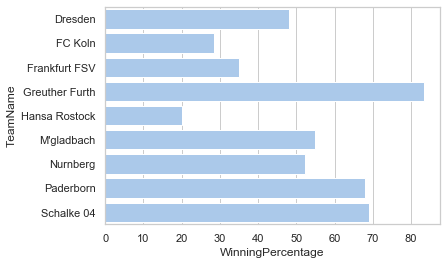

In [212]:
win_rain = sns.barplot(x="WinningPercentage", y="TeamName", data=rain,
            label="WinningPercentage", color="b", capsize=15)

# Mongo

In [ ]:
class MongoHandler():
    
    def __init__(self):
        self.date = date
        self.date[0] = year
        self.date[1] = month
        self.date[3] = day